## *Group Members -*

Niyati (18/94062)

Chaitanya Raj Dixit (18/94067)

Somya Chandra (18/94027)

Jagriti Verma (18/94058)

Problem Statement-

Classifying **genre** into classes based on **danceability**


Data Set :

Source - https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [103]:
import numpy as np  #importing numpy for numpy_array
import pandas as pd  #Importing Pandas for reading CSV files
import matplotlib.pyplot as plt  #importing matplotlib for plotting graphs 
import seaborn as sns  #importing seaborn for plotting heatmap
from sklearn.model_selection import train_test_split  #importing sklearn for regression method
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,export_text,export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix
!pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


Description :



In [104]:
from google.colab import drive
drive.mount('/content/gdrive') 
df = pd.read_csv('/content/gdrive/MyDrive/data_by_genres.csv')
df=df.dropna()
df=df.drop_duplicates()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [105]:
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1
4,abstract,0.411262,0.473600,3.660984e+05,0.479400,0.841400,0.097160,-15.799400,0.045300,142.495400,0.274260,43.800000,5,1


In [106]:
print(df.keys())

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')


In [108]:
print(df.describe())

       acousticness  danceability  ...          key         mode
count   3231.000000   3231.000000  ...  3231.000000  3231.000000
mean       0.368109      0.540808  ...     5.942123     0.819870
std        0.319733      0.149376  ...     3.343316     0.384355
min        0.000001      0.063200  ...     0.000000     0.000000
25%        0.082796      0.450167  ...     3.000000     1.000000
50%        0.279960      0.550335  ...     7.000000     1.000000
75%        0.629275      0.645504  ...     9.000000     1.000000
max        0.996000      0.940000  ...    11.000000     1.000000

[8 rows x 13 columns]


Information about type of attributes 

In [109]:
print(df.dtypes)

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object


Data Distribution (histogram) of attributes

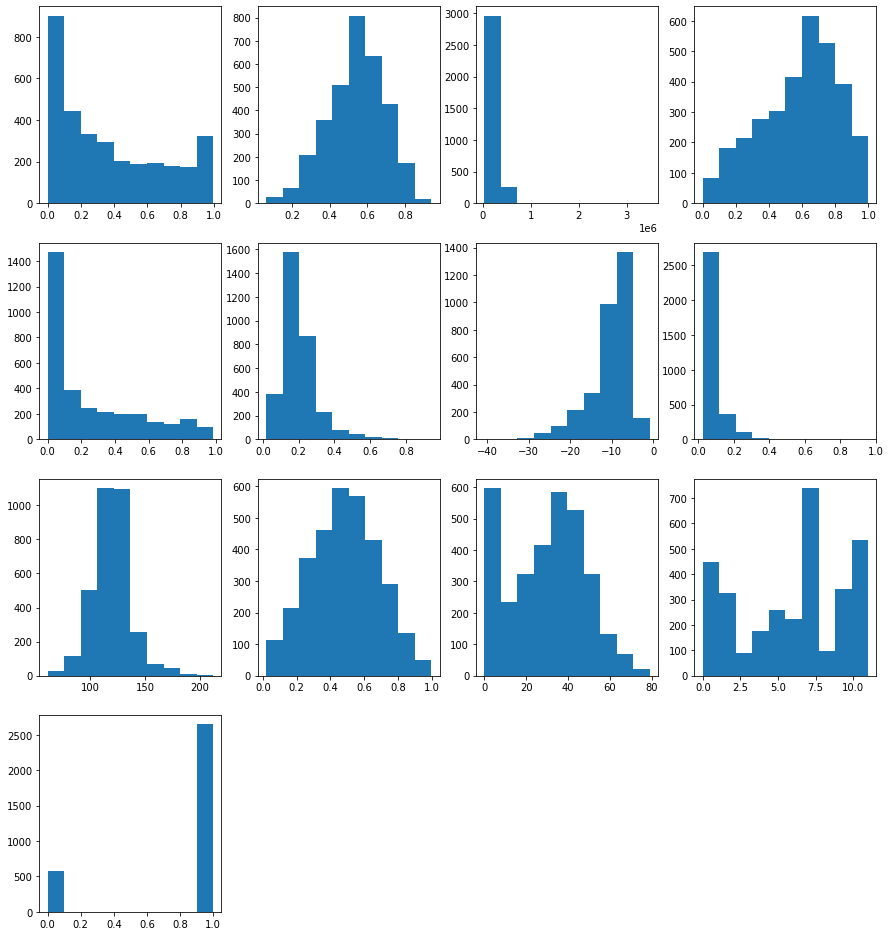

In [110]:
plt.figure(figsize = [15, 21]) 
for i in range(1,df.shape[1]):
 column=df.columns[i]
 plt.subplot(5,4, i)
 plt.hist(df[column])

In [112]:
# 0-0.3= least danceable 0.4-0.7=medium danceable >0.7 = most danceable
danceable = list()
column = df['danceability']
for index, item in enumerate(column.values):
  if(item>=0 and item<=0.25):
    danceable.append('least')
  elif(item>0.25 and item<=0.5):
    danceable.append('medium')
  elif(item>0.5 and item<=0.75):
    danceable.append('medium high')
  else:
    danceable.append('high')

df['danceable']= danceable
df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,danceable
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1,medium
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1,medium
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1,medium high
3,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1,medium high
4,abstract,0.411262,0.473600,3.660984e+05,0.479400,0.841400,0.097160,-15.799400,0.045300,142.495400,0.274260,43.800000,5,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,zim urban groove,0.003910,0.553000,4.267200e+04,0.942000,0.961000,0.113000,-8.004000,0.039900,134.995000,0.752000,9.000000,7,1,medium high
3227,zolo,0.208648,0.533837,2.641016e+05,0.620470,0.163334,0.201430,-10.878906,0.061828,126.765194,0.576721,31.108254,9,1,medium high
3228,zouk,0.272928,0.641889,4.416418e+05,0.695778,0.257604,0.166011,-9.518889,0.050511,105.848889,0.878444,32.555556,7,1,medium high
3229,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,0,medium high


 Information about class label distribution through pie chart

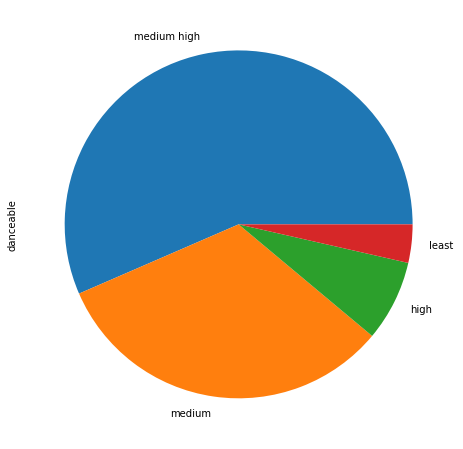

In [113]:
Danceable = df['danceable'].value_counts().plot(kind='pie', figsize=(8, 8))

Pre-Processing on the data

In [114]:
new_df=df.drop(['genres','key','mode'],axis = 1)

In [115]:
print('countable attributes')
print(new_df.shape[1])

countable attributes
12


In [116]:
Mean_result=list()
for i in range(0,11):
 column=new_df.columns[i]
 Mean_result.append(new_df[column].mean())
print(Mean_result)
print(len(Mean_result))

[0.36810882067161776, 0.5408082674379456, 261460.37754151007, 0.583504411964408, 0.25488071273961643, 0.20400431906344813, -10.395827919658329, 0.08499391412534824, 119.70867491960963, 0.4837560840851136, 29.706987936479106]
11


In [117]:
SD_result=list()
for i in range(0,11):
 column=new_df.columns[i]
 SD_result.append(new_df[column].std())
print(SD_result)

[0.31973333643777735, 0.14937602076500558, 125600.23454260152, 0.2329611464190059, 0.28395101118339156, 0.10345528218783698, 5.024773401003553, 0.08116904382161547, 17.336154360561583, 0.20041295562614114, 18.41571328563457]


In [118]:
sdf=new_df
for i in range(0,11):
 column=new_df.columns[i]
 sdf[column]=preprocessing.scale(new_df[column])
sdf

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,danceable
0,1.208979,-1.718803,0.725691,-1.820003,0.808339,-0.342465,-2.340283,-0.282589,-1.636007,-1.698637,-1.254937,medium
1,0.367256,-1.531997,6.258680,-0.823553,0.783248,0.598764,-1.539699,-0.163601,-0.046600,-1.234007,0.624184,medium
2,-1.061076,0.885097,-1.019315,1.573448,1.321275,-1.305155,0.496980,2.550703,4.217697,2.561328,-1.613382,medium high
3,1.020282,-0.164952,-0.474765,-1.086065,-0.770678,0.183475,-0.449984,-0.016838,-0.819377,-0.148112,0.509386,medium high
4,0.134987,-0.449996,0.833233,-0.446944,2.065885,-1.032918,-1.075553,-0.489103,1.314608,-1.045484,0.765389,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
3226,-1.139247,0.081630,-1.742212,1.539102,2.487149,-0.879785,0.476081,-0.555642,0.881896,1.338663,-1.124594,medium high
3227,-0.498807,-0.046675,0.021032,0.158703,-0.322453,-0.024884,-0.096154,-0.285444,0.407104,0.463937,0.076103,medium high
3228,-0.297735,0.676790,1.434785,0.482015,0.009591,-0.367300,0.174550,-0.424893,-0.799597,1.969680,0.154705,medium high
3229,1.954716,1.103818,-0.502012,-1.763819,0.752896,-0.235284,-0.210491,3.248943,-1.640218,1.273787,-1.613382,medium high


In [119]:
SMean_result=list()
for i in range(0,11):
 column=sdf.columns[i]
 SMean_result.append(round(sdf[column].mean()))
print(SMean_result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [120]:
SSD_result=list()
for i in range(0,11):
 column=sdf.columns[i]
 SSD_result.append(round(sdf[column].std()))
print(SSD_result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


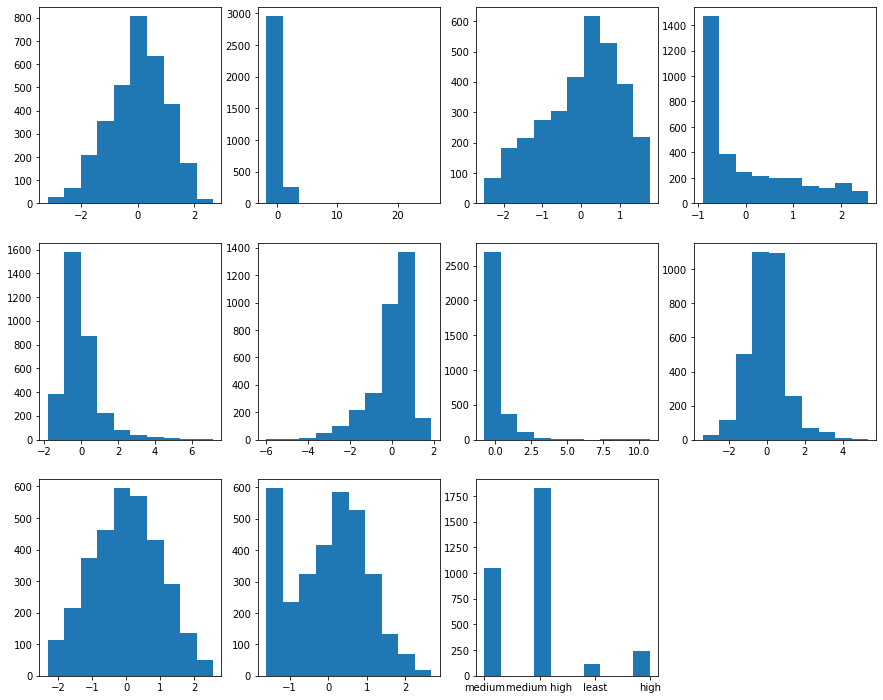

In [121]:
plt.figure(figsize = [15, 21]) 
for i in range(1,sdf.shape[1]):
 column=sdf.columns[i]
 plt.subplot(5,4, i)
 plt.hist(sdf[column])

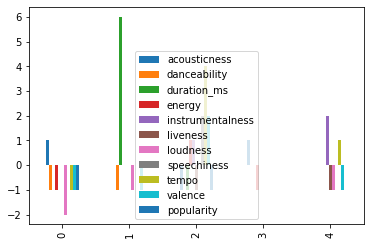

In [122]:
new_sdf=sdf.drop(['danceable'],axis = 1)
new_sdf = new_sdf.astype(int)
new_sdf.head().plot.bar()

In [123]:
X=sdf.values[:,:-1]
Y=sdf.values[:,-1]

In [124]:
print(X.shape)
print(Y.shape)

(3231, 11)
(3231,)


In [125]:
classLabels=np.unique(Y)
classLabels

array(['high', 'least', 'medium', 'medium high'], dtype=object)

In [126]:
test_val = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2423, 11)
(808, 11)
(2423,)
(808,)


In [128]:
DTclassifer = DecisionTreeClassifier().fit(X_train,Y_train)

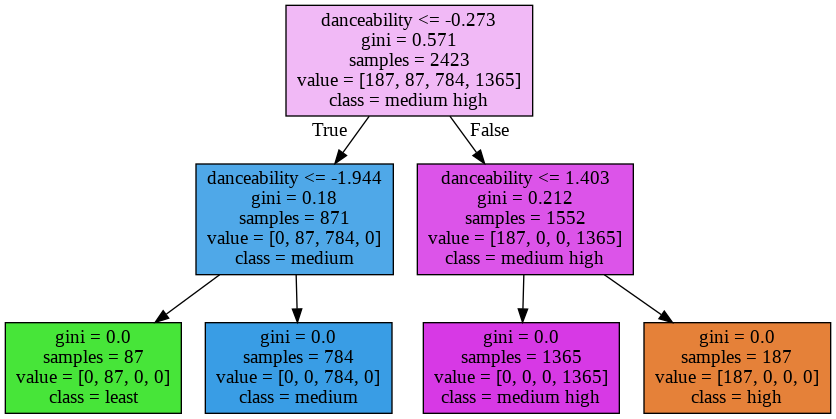

In [130]:
dot_data=export_graphviz(DTclassifer, feature_names=sdf.columns[:-1], class_names=classLabels, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [131]:
print(Y_test)
Y_predict=DTclassifer.predict(X_test)
print(Y_predict)

['medium high' 'medium high' 'medium high' 'medium high' 'medium'
 'medium high' 'medium high' 'medium high' 'medium' 'medium high'
 'medium high' 'medium high' 'medium high' 'medium high' 'medium high'
 'medium high' 'medium' 'medium high' 'medium high' 'medium high' 'medium'
 'medium' 'high' 'medium' 'medium' 'medium high' 'medium high'
 'medium high' 'medium' 'medium high' 'high' 'medium high' 'medium high'
 'medium high' 'medium high' 'medium high' 'medium high' 'medium high'
 'medium' 'medium high' 'high' 'medium' 'medium high' 'medium' 'medium'
 'medium high' 'medium high' 'medium' 'medium high' 'medium high'
 'medium high' 'medium high' 'medium high' 'medium high' 'medium' 'medium'
 'medium high' 'medium high' 'medium' 'medium high' 'high' 'medium high'
 'medium high' 'medium' 'medium' 'medium' 'medium high' 'medium high'
 'medium high' 'medium high' 'medium' 'medium high' 'medium high' 'medium'
 'medium' 'medium' 'least' 'medium high' 'medium high' 'medium'
 'medium high' 'medi

In [132]:
accuracy_score(Y_test, Y_predict)

1.0

In [133]:
confusematr=confusion_matrix(Y_test, Y_predict)
confusematr

array([[ 56,   0,   0,   0],
       [  0,  28,   0,   0],
       [  0,   0, 263,   0],
       [  0,   0,   0, 461]])

In [134]:
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f58a5830110>)

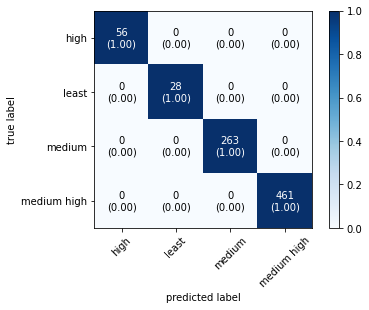

In [135]:
plot_confusion_matrix(conf_mat=confusematr, colorbar=True, show_absolute=True, show_normed=True, class_names=classLabels)

In [136]:
clf_report=classification_report(Y_test, Y_predict, target_names=classLabels, digits=5, output_dict=True)
print(clf_report)

{'high': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 56}, 'least': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 28}, 'medium': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 263}, 'medium high': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 461}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 808}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 808}}


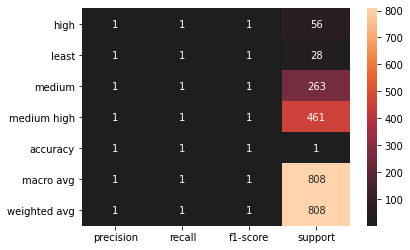

In [137]:
sns.heatmap(pd.DataFrame(clf_report).T, annot=True, fmt='.3g',center=True)

In [138]:
numTimes=10

accuracy=list()
for i in range(numTimes):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)
  DTclassifer = DecisionTreeClassifier(criterion="entropy").fit(X_train,Y_train)
  Y_predict=DTclassifer.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_predict))
print(sum(accuracy)/numTimes)

0.9995049504950495


In [139]:
k=10
scores=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(scores,scores.mean())

[1.         1.         1.         1.         1.         1.
 1.         0.99690402 0.99690402 1.        ] 0.9993808049535604


COMPARING ACCURACY IN CASE OF DECISION TREE,K-NEAREST NEIGHBORS AND NAIVE BAYES USING HOLDOUT METHOD

In [140]:
def ccompareClassifiers(split_ratio):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_ratio)
  clf = DecisionTreeClassifier(criterion='gini')
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  a1=accuracy_score(Y_test,Y_pred)
  print("Accuracy in decision tree base classifier:")
  print(a1)
  print("confusion matrix is:")
  confuss_mat=confusion_matrix(Y_test,Y_pred)
  print(confuss_mat)
  print("classification report:")
  clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,digits=4,output_dict=True)
  print(clf_report)
  #KNN
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_ratio)
  clf = KNeighborsClassifier(n_neighbors=4)
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  a2=accuracy_score(Y_test,Y_pred)
  print("Accuracy in KNN base classifier:")
  print(a2)
  print("confusion matrix is:")
  confuss_mat=confusion_matrix(Y_test,Y_pred)
  print(confuss_mat)
  print("classification report:")
  clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,digits=4,output_dict=True)
  print(clf_report)
  #naive bayes
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_ratio)
  clf = GaussianNB()
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  a3=accuracy_score(Y_test,Y_pred)
  print("Accuracy in naive bayes base classifier:")
  print(a1)
  print("confusion matrix is:")
  confuss_mat=confusion_matrix(Y_test,Y_pred)
  print(confuss_mat)
  print("classification report:")
  clf_report=classification_report(Y_test, Y_pred, target_names=classLabels,digits=4,output_dict=True)
  print(clf_report)
  return a1,a2,a3
a=ccompareClassifiers(0.33)

Accuracy in decision tree base classifier:
0.9990627928772259
confusion matrix is:
[[ 81   0   0   0]
 [  0  37   0   0]
 [  0   0 352   0]
 [  0   0   1 596]]
classification report:
{'high': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 81}, 'least': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37}, 'medium': {'precision': 0.9971671388101983, 'recall': 1.0, 'f1-score': 0.9985815602836879, 'support': 352}, 'medium high': {'precision': 1.0, 'recall': 0.998324958123953, 'f1-score': 0.9991617770326907, 'support': 597}, 'accuracy': 0.9990627928772259, 'macro avg': {'precision': 0.9992917847025495, 'recall': 0.9995812395309882, 'f1-score': 0.9994358343290947, 'support': 1067}, 'weighted avg': {'precision': 0.9990654478549107, 'recall': 0.9990627928772259, 'f1-score': 0.9990630647688608, 'support': 1067}}
Accuracy in KNN base classifier:
0.8397375820056232
confusion matrix is:
[[ 58   0   0  26]
 [  0  24   6   0]
 [  0  13 302  47]
 [ 16   0  63 512]]
classi

In [141]:
a

(0.9990627928772259, 0.8397375820056232, 0.8472352389878163)

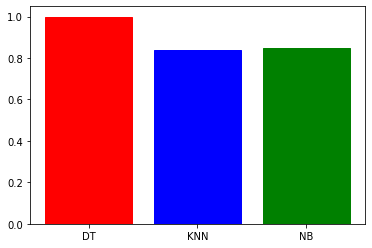

In [142]:
l = ['DT', 'KNN', 'NB']
barlist=plt.bar(l,a)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.show()

COMPARING ACCURACY IN CASE OF DECISION TREE,K-NEAREST NEIGHBORS AND NAIVE BAYES USING K-FOLD METHOD

In [143]:
k=10  
def ccompareClassifiers(k):
  score=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
  print(" K fold cross verlidation for Decision tree: ")
  print(score)
  s1=score.mean()
  print(s1)
  score=cross_val_score( KNeighborsClassifier(),X,Y,cv=k)
  print(" K fold cross verlidation for k-nearest neighbors: ")
  print(score)
  s2=score.mean()
  print(s2)
  score=cross_val_score( GaussianNB(),X,Y,cv=k)
  print(" K fold cross verlidation for naive bayes: ")
  print(score)
  s3=score.mean()
  print(s3)
  return s1,s2,s3
s=ccompareClassifiers(12)  

 K fold cross verlidation for Decision tree: 
[1.         1.         1.         1.         1.         1.
 1.         1.         0.99628253 1.         0.99628253 1.        ]
0.9993804213135068
 K fold cross verlidation for k-nearest neighbors: 
[0.86666667 0.83333333 0.88148148 0.8401487  0.84386617 0.82899628
 0.84386617 0.80297398 0.82156134 0.84758364 0.89219331 0.86245353]
0.8470937170131717
 K fold cross verlidation for naive bayes: 
[0.88148148 0.84444444 0.85555556 0.85873606 0.85130112 0.87732342
 0.86988848 0.81784387 0.86988848 0.86988848 0.85501859 0.86988848]
0.8601048694295287


In [144]:
s

(0.9993804213135068, 0.8470937170131717, 0.8601048694295287)

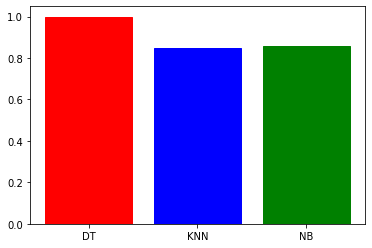

In [145]:
l = ['DT', 'KNN', 'NB']
barlist=plt.bar(l,s)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.show()

CONCLUSION:

Percentage of Genre danceabiltiy

In [148]:
df['danceable'].value_counts(normalize=True) * 100

medium high    56.515011
medium         32.404828
high            7.520891
least           3.559270
Name: danceable, dtype: float64

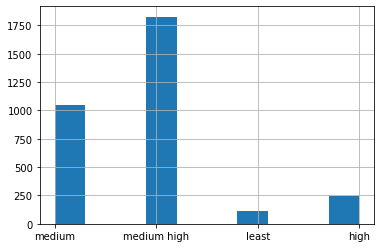

In [149]:
df['danceable'].hist()